# Programa Principal

Aqui seram reunidas as soluções. O programa criará a malha e importará as funções dos arquivos ``.py`` da solução por sistema e da solução interativa.

Solução por sistemas de equação usando 'scypy.solve':
Tempo de montagem (clock):  9.0357 segundos
Tempo de solução (clock):  5.1128 segundos


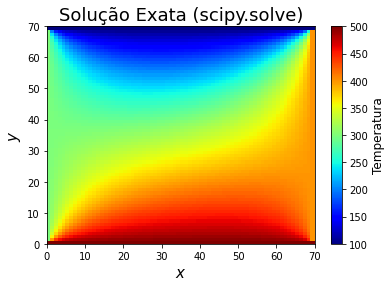

Solução por método iterativo:
         Dimensão da malha: 70 linhas/colunas
   Limite superior do erro: 0.1 %
                 Iterações: 400
           Pontos iterados: 1849600
 Tempo de Iteração (clock): 6.163 segundos
  Tempo de solução (clock):  0.429 segundos


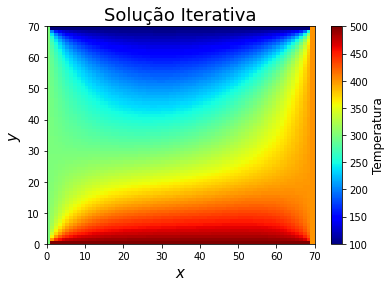

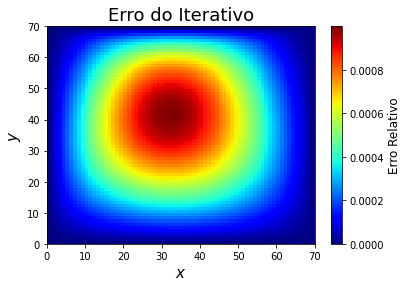

In [ ]:
% matplotlib inline


##################
#### para importar aquivo do drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sistemas = drive.CreateFile({'id':'1EvS125gE7GVeJmtk8dBsaJ5EbAp5bTwY'})
sistemas.GetContentFile('sistemas.py')




from sistemas import *

from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import time


############ MALHA
# Número de linhas e colunas da malha 
n = 70
xi, xf, p = 0, 20, .05


X = np.linspace(xi, xf , n)
Y = X.copy()
h = (xf-xi)/n # Passo da malha

T = np.zeros([n,n])

# Erro do iterativo
Lim = 1E-3

# Condições de Contorno
T[0, :] = x_inf = 500 #inf
T[-1, :] = x_sup = 100 #sup
T[:, -1] = x_dir = 400 #dir
T[:, 0] = x_esq = 300 #esq

T_solve = T.copy()
T_iter = T.copy()

# Limite superior do erro para o caso interativo


############ SOLUÇÂO POR SISTEMAS
print("Solução por sistemas de equação usando 'scypy.solve':")


t1 = time.clock()

b = termos_ind(T)
A = coef_T(n)

t2 = time.clock()

T_solve = solucao_solve(A, b, n, x_esq, x_dir, x_sup, x_inf)
t3 = time.clock()

print("Tempo de montagem (clock): ", np.round(t2-t1,4), "segundos")
print("Tempo de solução (clock): ", np.round(t3-t2,4), "segundos")

fig, ax = plt.subplots()
pcolor(T_solve, cmap = 'jet')
cbar = colorbar()
title('Solução Exata (scipy.solve)', fontsize=18)
cbar.ax.set_ylabel('Temperatura', fontsize=12)
xlabel('$x$', fontsize=15)
ylabel('$y$', fontsize=15)
show()



############ SOLUÇÂO ITERATIVA
print("Solução por método iterativo:")

t4 = time.clock()
T_iter, erro = solucao_iterativa(T_iter, Lim)
t5 = time.clock()

print("  Tempo de solução (clock): ", np.round(t4-t3,3), "segundos")

fig2, ax2 = plt.subplots()
pcolor(T_iter, cmap = 'jet')
cbar = colorbar()
title('Solução Iterativa', fontsize=18)
cbar.ax.set_ylabel('Temperatura', fontsize=12)
xlabel('$x$', fontsize=15)
ylabel('$y$', fontsize=15)
show()

############ ERRO RELATIVO 
fig2, ax2 = plt.subplots()
pcolor(erro, cmap = 'jet')
cbar = colorbar()
title('Erro do Iterativo', fontsize=18)
cbar.ax.set_ylabel('Erro Relativo', fontsize=12)
xlabel('$x$', fontsize=15)
ylabel('$y$', fontsize=15)
show()


